# Lab 08: Normal Distribution and Variance of Sample Means

Welcome to Lab 08! In today's lab, we will learn about [the variance of sample means](https://inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html) as well as [standard deviation and the normal distribution](https://inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html).

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Also, throughout this lab please be sure to not re-assign variables throughout the notebook. For example, if you use `expected_proportion_correct` in your answer to one question, do not reassign it later on. Moreover, be mindful that functions that you write in earlier cells will need to be referenced to answer questions in later questions.

**Due Date:** 

**Collaboration Policy:** Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others **please include their names below** (it's a good way to learn your classmates' names).

**Collaborators:** 

List collaborators here. 

**Recommended Reading:**

* [Variability](https://inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html)

* [The SD and the Normal Curve](https://inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html)

First, set up the notebook by running the cell below.

In [56]:
from datascience import *
import numpy as np
import math

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# 1. Normal Distributions

When we visualize the distribution of a sample, we are often interested in the mean and the standard deviation of the sample (for the rest of this lab, we will abbreviate “standard deviation” as “SD”). These two summary statistics can give us a bird’s eye view of the distribution - by letting us know where the distribution sits on the number line and how spread out it is, respectively. 

If we want to check if the data is linearly related, then we should look at (i.e. visualize) the data.

**Question 1.** The next cell loads the table `births` from lecture, which is a large random sample of US births and includes information about mother-child pairs. 

Plot the distribution of mother’s ages from the table. Don’t change the last line, which will plot the mean of the sample on the distribution itself.


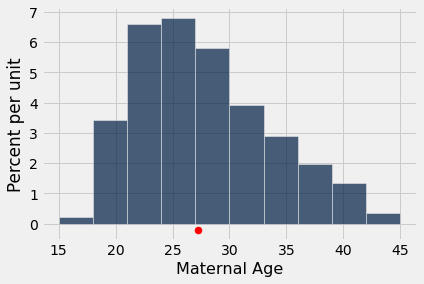

In [14]:
births = Table().read_table('data/baby.csv') 
# BEGIN SOLUTION NO PROMPT
births.hist('Maternal Age')
# END SOLUTION
""" # BEGIN PROMPT
births.hist(...)
"""; # END PROMPT

# Do not change this line
plt.scatter(np.mean(births.column('Maternal Age')), -0.002, color='red', s=50);

From the plot above, we can see that the mean is the center of gravity or balance point of the distribution. If you cut the distribution out of cardboard, and then placed your finger at the mean, the distribution would perfectly balance on your finger. Since the distribution above is right skewed (which means it has a long right tail), we know that the mean of the distribution is larger than the median, which is the “halfway” point of the data. Conversely, if the distribution had been left skewed, we know the mean would be smaller than the median.

Run the following cell to compare the mean (red) and median (green) of the distribution of mothers ages.

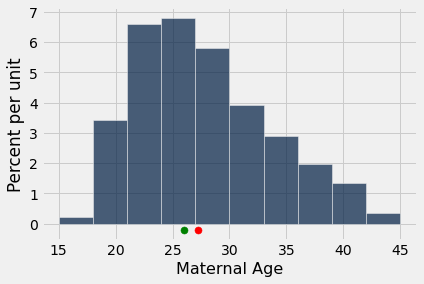

In [15]:
births.hist('Maternal Age')
plt.scatter(np.mean(births.column('Maternal Age')), -0.002, color='red', s=50)
plt.scatter(np.median(births.column('Maternal Age')), -0.002, color='green', s=50);

**Question 2.** Assign the provided variable to one of the following three integers, depending on the value of the mean (red) and median (green). 

1. The mean equal to the median.
2. The mean is greater than the median.
3. The mean is less than the median.


In [16]:
mean_median = 2 # SOLUTION

In [17]:
mean_median in [1,2,3]

True

In [18]:
# HIDDEN
mean_median

2

We are also interested in the standard deviation of mother’s ages. The SD gives us a sense of how variable mothers' ages are around the average mothers' age. If the SD is large, then the mothers' heights should spread over a large range from the mean. If the SD is small, then the mothers' heights should be tightly clustered around the average mother height. 

**The SD of an array is defined as the root mean square of deviations (differences) from average**.

Fun fact, σ (Greek letter sigma) is used to represent the SD and  μ (Greek letter mu) is used for the mean.

**Question 3.** Run the cell below to see the width of one SD (blue) from the sample mean (red) plotted on the histogram of maternal ages.


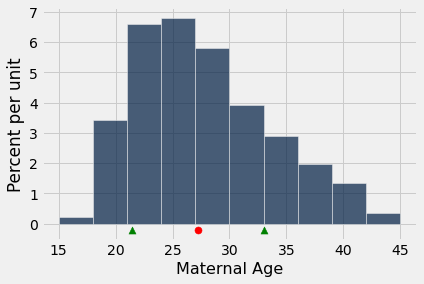

In [19]:
age_mean = np.mean(births.column('Maternal Age')) # SOLUTION
age_sd = np.std(births.column('Maternal Age')) # SOLUTION
births.hist('Maternal Age')

# Do not change these lines
plt.scatter(age_mean, -0.002, color='red', s=50)
plt.scatter(age_mean+age_sd, -0.002, marker='^', color='green', s=50)
plt.scatter(age_mean-age_sd, -0.002, marker='^', color='green', s=50);

In [8]:
age_mean < 100

True

In [9]:
age_sd < 100

True

In [20]:
# HIDDEN
age_mean == np.mean(births.column('Maternal Age'))

True

In [21]:
# HIDDEN
age_sd == np.std(births.column('Maternal Age'))

True

In the histogram above, the standard deviation is not easy to identify just by looking at the graph.

However, the distributions of some variables allow us to easily spot the standard deviation on the plot. For example, if a sample follows a *normal distribution*, the standard deviation is easily spotted at the point of inflection (the point where the curve begins to change the direction of its curvature) of the distribution.

**Question 4.** Fill in the following code to examine the distribution of maternal heights, which is roughly normally distributed. We’ll plot the standard deviation on the histogram, as before - notice where one standard deviation (blue) away from the mean (red) falls on the plot.


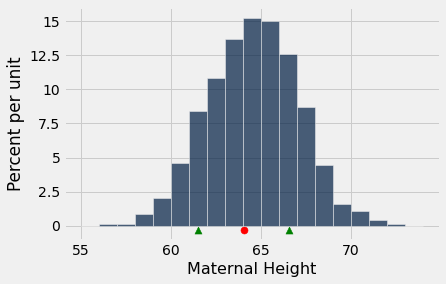

In [24]:
height_mean = np.mean(births.column('Maternal Height')) # SOLUTION
height_sd = np.std(births.column('Maternal Height')) # SOLUTION

# Do not change these lines
my_bins = np.arange(55,75,1)
births.hist('Maternal Height', bins=my_bins)
plt.scatter((height_mean), -0.003, color='red', s=50)
plt.scatter(height_mean+height_sd, -0.003, marker='^', color='green', s=50)
plt.scatter(height_mean-height_sd, -0.003, marker='^', color='green', s=50);

In [25]:
height_mean < 100

True

In [26]:
height_sd < 100

True

In [27]:
# HIDDEN
height_mean == np.mean(births.column('Maternal Height'))

True

In [28]:
# HIDDEN
height_sd == np.std(births.column('Maternal Height'))

True

We don’t always know how a variable will be distributed, and making assumptions about whether or not a variable will follow a normal distribution is dangerous. However, the Central Limit Theorem defines one distribution that always follows a normal distribution. The distribution of the *sums* and *means* of many large random samples drawn with replacement from a single distribution (regardless of the distribution’s original shape) will be normally distributed. Remember that the Central Limit Theorem refers to the distribution of a *statistic* calculated from a distribution, not the distribution of the original sample or population. If this is confusing, you can ask another student in your class or your instructor.

The next section will explore distributions of sample means, and you will see how the standard deviation of these distributions depends on sample sizes.

# 2. Variability of the Sample Mean

By the [Central Limit Theorem](https://www.inferentialthinking.com/chapters/14/4/Central_Limit_Theorem.html), the probability distribution of the mean of a large random sample is roughly normal. The bell curve is centered at the population mean. Some of the sample means are higher and some are lower, but the deviations from the population mean are roughly symmetric on either side, as we have seen repeatedly. Formally, probability theory shows that the sample mean is an **unbiased estimate** of the population mean.

In our simulations, we also noticed that the means of larger samples tend to be more tightly clustered around the population mean than means of smaller samples. In this section, we will quantify the [variability of the sample mean](https://www.inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html) and develop a relation between the variability and the sample size.

Let's take a look at the salaries of employees of the City of Raleigh in 2014. The mean salary reported by the city government was about $75,463.92.

**Note:** If you get stuck on any part of this lab, please refer to [Chapter 14 of the textbook](https://www.inferentialthinking.com/chapters/14/Why_the_Mean_Matters.html).

In [29]:
salaries = Table().read_table('data/ral_salaries_2014.csv').select('salary')
salaries

salary
471953
390112
339654
326717
326233
344187
311299
310161
335485
329391


In [30]:
salary_mean = np.mean(salaries.column('salary'))
print('Mean salary of Raleigh city employees in 2014 was ', round(salary_mean, 2))

Mean salary of Raleigh city employees in 2014 was  75463.92


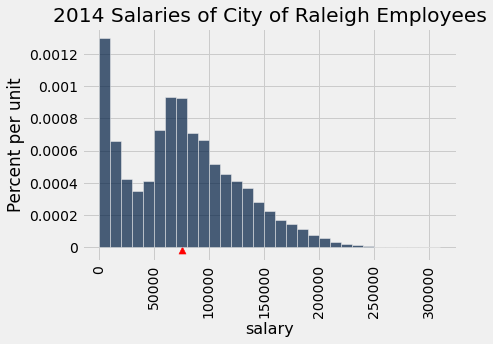

In [32]:
salaries.hist('salary', bins = np.arange(0, 300000+10000*2, 10000))
plt.scatter(salary_mean, -0.0000002, marker='^', color='red', s=50);
plt.title('2014 Salaries of City of Raleigh Employees');

Clearly, the population does not follow a normal distribution. Keep that in mind as we progress through these exercises.

Let's take random samples **with replacement** and look at the probability distribution of the sample mean. As usual, we will use simulation to get an empirical approximation to this distribution.

**Question 5.** Define a function `one_sample_mean`. Its arguments should be `table` (the name of a table), `label` (the label of the column containing the variable), and `sample size`(the number of employees in the sample). It should sample with replacement from the table and
return the mean of the `label` column of the sample.


In [34]:
def one_sample_mean(table, label, sample_size):
    """A function that samples with replacement from a table
       and returns the mean of a category from a column.
    """
# BEGIN SOLUTION NO PROMPT
    new_sample = table.sample(sample_size, with_replacement=True) 
    new_sample_mean = np.mean(new_sample.column(label))  
    return new_sample_mean  
# END SOLUTION
""" # BEGIN PROMPT
    new_sample = ...
    new_sample_mean = ... 
    return ...
"""; # END PROMPT

In [35]:
np.random.seed(123)
one_sample_mean(salaries, 'salary', 100)

81225.33280000002

**Question 6.** Use `one_sample_mean` to define a function `simulate_sample_mean`. The arguments are the name of the table, the label of the column containing the variable, the sample size, and the number of simulations.

The function should sample with replacement from the table and calculate the mean of each sample. It should save the sample means in an array called `means`. The remaining code in the function displays an empirical histogram of the sample means.


In [36]:
"""Empirical distribution of random sample means"""
# BEGIN SOLUTION NO PROMPT
def simulate_sample_mean(table, label, sample_size, repetitions):
    """A function that samples with replacement from a table and
       calculates the mean of each sample, saves the sample mean
       to an array and plots an empirical histogram of the sample means.
    """
    means = make_array()
    for i in np.arange(repetitions):
        new_sample_mean = one_sample_mean(table, label, sample_size)
        means = np.append(means, new_sample_mean) #SOLUTION
        sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities – do not change these lines
    sample_means.hist(bins=20)
    plt.xlabel('Sample Means')
    plt.title('Sample Size ' + str(sample_size))
    print('Sample size: ', sample_size)
    print('Population mean: ', np.mean(table.column(label)))
    print('Average of sample means: ', np.mean(means))
    print('Population SD: ', np.std(table.column(label)))
    print('SD of sample means: ', np.std(means))
    return np.std(means)  
# END SOLUTION
""" # BEGIN PROMPT
    means = make_array()
    for i in np.arange(repetitions):
        new_sample_mean = ...
        means = ...
        sample_means = ...
    
    # Display empirical histogram and print all relevant quantities – do not change these lines
    sample_means.hist(bins=20)
    plt.xlabel('Sample Means')
    plt.title('Sample Size ' + str(sample_size))
    print('Sample size: ', sample_size)
    print('Population mean: ', np.mean(table.column(label)))
    print('Average of sample means: ', np.mean(means))
    print('Population SD: ', np.std(table.column(label)))
    print('SD of sample means: ', np.std(means))
    return np.std(means)  
"""; # END PROMPT

Verify with a classmate or your instructor that you've implemented the function above correctly. If you haven't implemented it correctly, the rest of the lab won't work properly, so this step is crucial.

In the following cell, we will create a sample of size 100 from `salaries` and graph it using our new `simulate_sample_mean` function.
 
**Hint:** You should see a distribution similar to something we've been talking about. If not, check your function.

Sample size:  100
Population mean:  75463.91814023031
Average of sample means:  75460.52088122
Population SD:  51697.0349864653
SD of sample means:  5132.607703064243


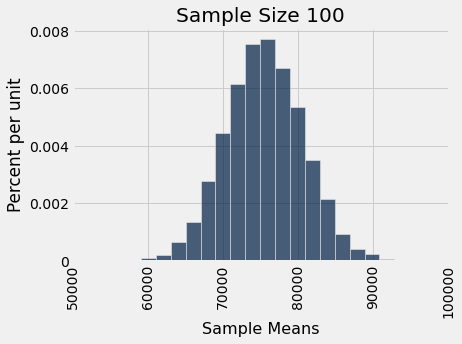

In [37]:
simulate_sample_mean(salaries, 'salary', 100, 10000) 
plt.xlim(50000, 100000);

**Question 7.** Simulate two sample means, one for a sample of 400 salaries and one for a sample of 625 salaries. In each case, perform 10,000 repetitions. Don't worry about the `plots.xlim` line – it just makes sure that all of the plots have the same x-axis. 


Sample size:  400
Population mean:  75463.91814023031
Average of sample means:  75513.82079309999
Population SD:  51697.0349864653
SD of sample means:  2569.6422714193795


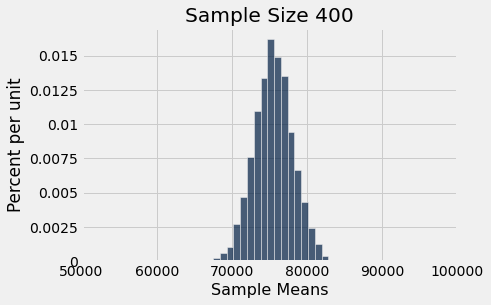



Sample size:  625
Population mean:  75463.91814023031
Average of sample means:  75429.2991647712
Population SD:  51697.0349864653
SD of sample means:  2096.185021496328


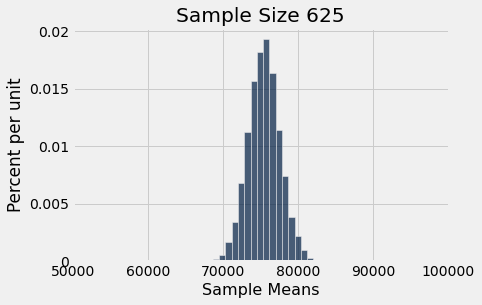

In [38]:
# BEGIN SOLUTION NO PROMPT
simulate_sample_mean(salaries, 'salary', 400, 10000)
plt.xlim(50000, 100000);
plt.show();
print('\n')
simulate_sample_mean(salaries, 'salary', 625, 10000)
plt.xlim(50000, 100000);
plt.show();
# END SOLUTION
""" # BEGIN PROMPT
simulate_sample_mean(..., ..., ..., ...)
plt.xlim(50000, 100000);
plt.show();
print('\n')
simulate_sample_mean(..., ..., ..., ...)
plt.xlim(50000, 100000);
plt.show();
"""; # END PROMPT

**Question 8.** Use the `make_array` function to assign `q8` to an array of numbers corresponding to true statement(s) about the plots from **Question 7.**.

1. We see the Central Limit Theorem (CLT) in action because the distributions of the sample means are bell-shaped.
2. We see the Law of Averages in action because the distributions of the sample means look like the distribution of the population.
3. One of the conditions for CLT is that we have to draw a small random sample with replacement from the population.
4. One of the conditions for CLT is that we have to draw a large random sample with replacement from the population.
5. One of the conditions for CLT is that the population must be normally distributed.
6. Both plots in 2.3 are roughly centered around the population mean.
7. Both plots in 2.3 are roughly centered around the mean of a particular sample.
8. The distribution of sample means for sample size 625 has less variability than the distribution of sample means for sample size 400.
9. The distribution of sample means for sample size 625 has more variability than the distribution of sample means for sample size 400.


In [39]:
q8 = make_array(1, 4, 6, 8) # SOLUTION

In [40]:
set(q8).issubset(set([1,2,3,4,5,6,7,8,9]))

True

In [41]:
# HIDDEN
set(q8) == set([1, 4, 6, 8])

True

Below, we'll look at what happens when we take an increasing number of resamples of a fixed sample size. Notice what number in the code changes, and what stays the same. How does the distribution of the resampled means change?

Sample size:  100
Population mean:  75463.91814023031
Average of sample means:  75140.47323080001
Population SD:  51697.0349864653
SD of sample means:  5175.934008956742


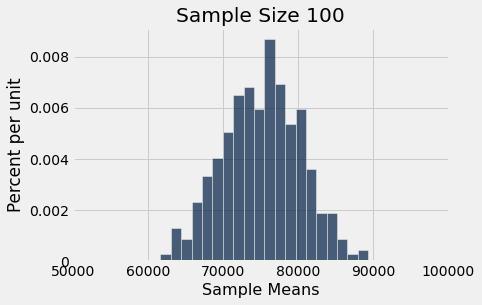

In [42]:
simulate_sample_mean(salaries, 'salary', 100, 500)
plt.xlim(50000, 100000);

Sample size:  100
Population mean:  75463.91814023031
Average of sample means:  75592.20826840002
Population SD:  51697.0349864653
SD of sample means:  5263.220718544891


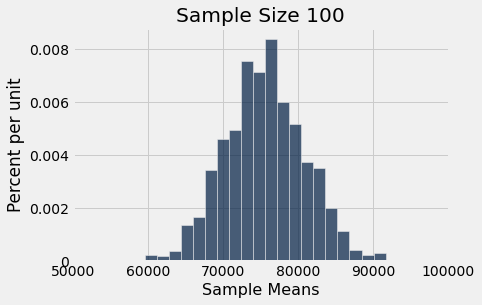

In [43]:
simulate_sample_mean(salaries, 'salary', 100, 1000)
plt.xlim(50000, 100000);

Sample size:  100
Population mean:  75463.91814023031
Average of sample means:  75327.42792156
Population SD:  51697.0349864653
SD of sample means:  5253.256138776629


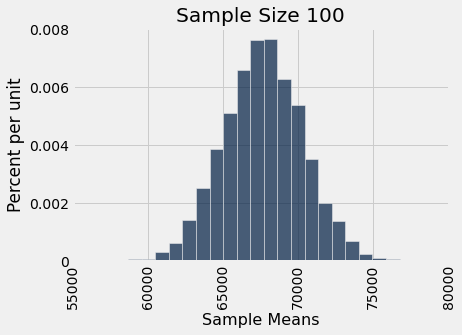

In [44]:
simulate_sample_mean(salaries, 'salary', 100, 5000)
plt.xlim(50000, 100000);

Sample size:  100
Population mean:  75463.91814023031
Average of sample means:  75512.5117681
Population SD:  51697.0349864653
SD of sample means:  5224.978015413338


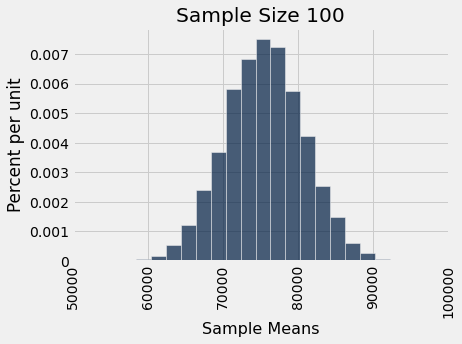

In [45]:
simulate_sample_mean(salaries, 'salary', 100, 10000)
plt.xlim(50000, 100000);

What did you notice about the distributions of sample means in the four histograms above? Discuss with your classmates. If you're unsure of your conclusion, ask your instructor.

**Question 9.** Assign the variable `SD_of_sample_means` to the integer corresponding to your answer to the following question:

When I increase the number of resamples that I take, for a fixed sample size, the SD of my sample means will...

1. Increase
2. Decrease
3. Stay about the same
4. Vary wildly


In [46]:
SD_of_sample_means = 3 # SOLUTION

In [33]:
SD_of_sample_means in [1,2,3,4]

True

In [47]:
# HIDDEN
SD_of_sample_means

3

**Question 10.** Let's think about how the relationships between population SD, sample SD, and SD of sample means change with varying sample size. Which of the following is true? Assign the variable `pop_vs_sample` to an array of integer(s) that correspond to true statement(s).

1. Sample SD gets smaller with increasing sample size.
2. Sample SD gets larger with increasing sample size.
3. Sample SD becomes more consistent with population SD with increasing sample size.
4. SD of sample means gets smaller with increasing sample size.
5. SD of sample means gets larger with increasing sample size.
6. SD of sample means stays the same with increasing sample size.


In [48]:
pop_vs_sample = make_array(3, 4) # SOLUTION

In [49]:
set(pop_vs_sample).issubset(set([1,2,3,4,5,6])) 

True

In [50]:
# HIDDEN
set(pop_vs_sample) == set([3, 4])

True

Run the following three cells multiple times and examine how the sample SD and the SD of sample means change with sample size.

The first histogram is of the sample; the second histogram is the distribution of sample means with that particular sample size. Adjust the bins as necessary.

Sample SD:  38390.26678626941
Sample size:  10
Population mean:  75463.91814023031
Average of sample means:  75715.303537
Population SD:  51697.0349864653
SD of sample means:  16043.267137351562


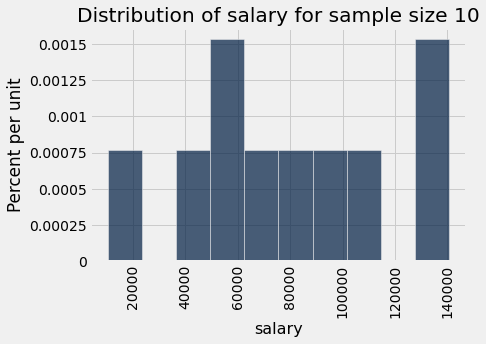

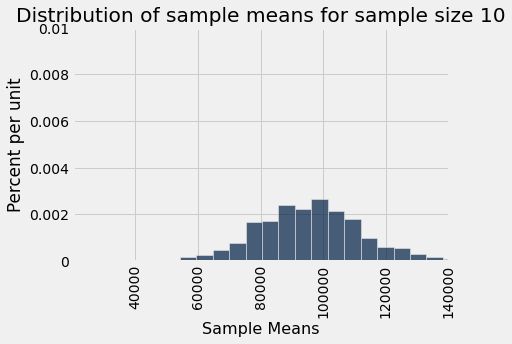

In [51]:
sample_10 = salaries.sample(10)
sample_10.hist("salary")
plt.title('Distribution of salary for sample size 10')
print("Sample SD: ", np.std(sample_10.column("salary")))
simulate_sample_mean(salaries, 'salary', 10, 1000)
plt.xlim(5,120000);
plt.ylim(0, .0001);
plt.title('Distribution of sample means for sample size 10');

Sample SD:  49280.088481047314
Sample size:  200
Population mean:  75463.91814023031
Average of sample means:  75445.6778692
Population SD:  51697.0349864653
SD of sample means:  3693.556441728853


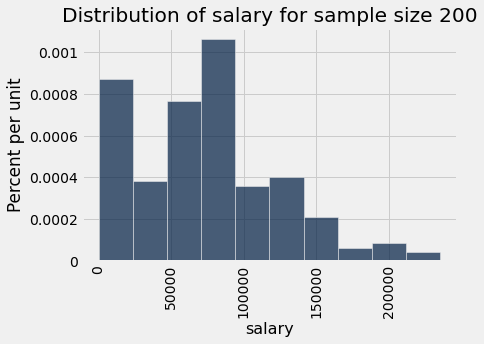

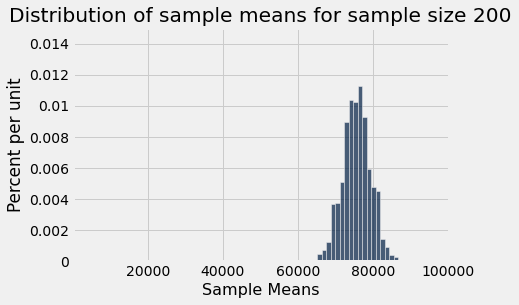

In [52]:
sample_200 = salaries.sample(200)
sample_200.hist("salary")
plt.title('Distribution of salary for sample size 200')
print("Sample SD: ", np.std(sample_200.column("salary")))
simulate_sample_mean(salaries, 'salary', 200, 1000)
plt.xlim(5,100000)
plt.ylim(0, .00015);
plt.title('Distribution of sample means for sample size 200');

Sample SD:  53679.02450559239
Sample size:  1000
Population mean:  75463.91814023031
Average of sample means:  75530.37377805001
Population SD:  51697.0349864653
SD of sample means:  1683.684627216543


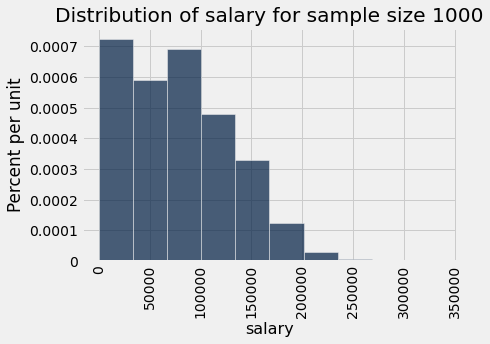

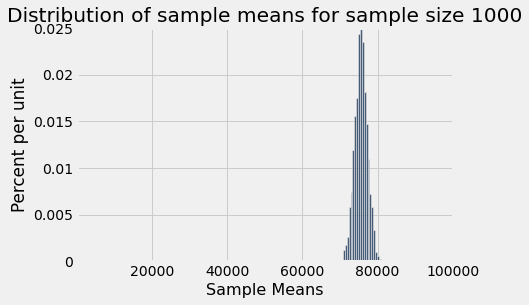

In [53]:
sample_1000 = salaries.sample(1000)
sample_1000.hist("salary")
plt.title('Distribution of salary for sample size 1000')
print("Sample SD: ", np.std(sample_1000.column("salary")))
simulate_sample_mean(salaries, 'salary', 1000, 1000)
plt.xlim(5,100000)
plt.ylim(0, .00025);
plt.title('Distribution of sample means for sample size 1000');

You should notice that the distribution of means gets narrower and spikier, and that the distribution of the sample increasingly looks like the distribution of the population as we get to larger sample sizes. 

Let's illustrate these trends. Below, you will see how the sample SD changes with respect to sample size (N). The blue line is the population SD.

**Note:** Run the cell below - Do not change it.

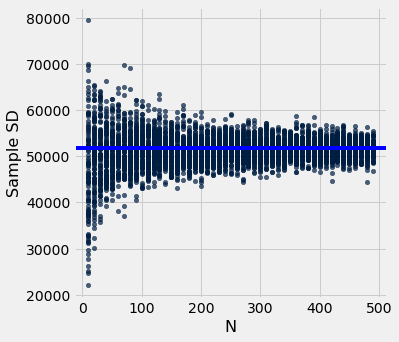

In [57]:
pop_sd = np.std(salaries.column('salary'))
sample_sds = make_array()
sample_sizes = make_array()
for i in np.arange(10, 500, 10):
    sample_sds = np.append(sample_sds, [np.std(salaries.sample(i).column("salary")) for d in np.arange(100)])
    sample_sizes = np.append(sample_sizes, np.ones(100) * i)
Table().with_columns("Sample SD", sample_sds, "N", sample_sizes).scatter("N", "Sample SD")
matplotlib.pyplot.axhline(y=pop_sd, color='blue', linestyle='-');

The next cell shows how the SD of the sample means changes relative to the sample size (N).

**Note:** Run the cell below - Do not change it.

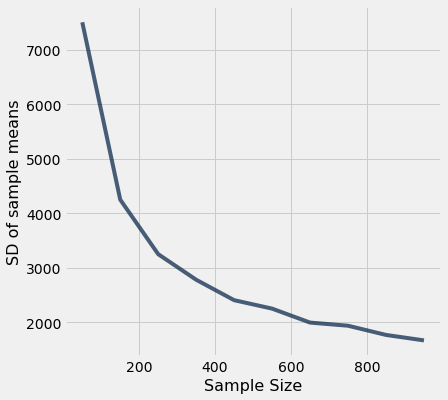

In [58]:
def sample_means(sample_size):
    """A function that returns the standard deviation
       of an array of sample means.
    """
    means = make_array()
    for i in np.arange(1000):
        sample = salaries.sample(sample_size).column('salary')
        means = np.append(means, np.mean(sample))
    return np.std(means)

sample_mean_SDs = make_array()
for i in np.arange(50, 1000, 100):
    sample_mean_SDs = np.append(sample_mean_SDs, sample_means(i))
Table().with_columns("SD of sample means", sample_mean_SDs, "Sample Size", np.arange(50, 1000, 100))\
.plot("Sample Size", "SD of sample means")

From these two plots, we can see that the SD of our **sample** approaches the SD of our population as our sample size increases, but the SD of our **sample means** (in other words, the variability of the sample mean) decreases as our sample size increases.

**Question 11.** Is there a relationship between the sample size and the standard deviation of the sample mean? Assign `q11` to the number corresponding to the statement that answers this question.

1. The SD of the sample means is inversely proportional to the square root of sample size.

2. The SD of the sample means is directly proportional to the square root of sample size.


In [59]:
q11 = 1 # SOLUTION

In [60]:
q11 in [1,2]

True

In [62]:
# HIDDEN
q11

1

Throughout this lab, we have been taking many random samples from a population. However, all of these principles hold for bootstrapped resamples from a single sample. If your original sample is relatively large, all of your re-samples will also be relatively large, and so the SD of resampled means will be relatively small. 

In order to change the variability of your sample mean, you’d have to change the size of the original sample from which you are taking bootstrapped resamples.

There weren't many tests, but there were a lot of points at which you should've stopped and understood exactly what was going on. Consult the textbook or ask your instructor if you have any other questions.

# 3. Submitting your work

You're done with Lab 08! All assignments in the course will be distributed as notebooks like this one, and you will submit your work by doing the following:

* Save your notebook

* Restart the kernel and run up to this cell.

* Run all the tests by running the cell containing `grader.check_all()`. Make sure they pass the way you expect them to.

* Run the cell below with the code `grader.export("lab08.ipynb")`.

* Download the file named `lab08.zip`, found in the explorer pane on the left side of the screen.

* Upload `lab08.zip` to the Lab 08 assignment to Gradescope for Grading.